# Deep Learning basic

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(f"Tensorflow:{tf.__version__}\nKeras: {keras.__version__}")

Tensorflow:2.17.1
Keras: 3.5.0


In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import random

# 1.Load Data

In [4]:
(x_train, y_train), (x_test, y_test)=keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
type(x_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [6]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [7]:
y_train[0]

9

In [8]:
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat", "Sandal","Shirt","Sneaker","Bag","Ankle boot"]
class_names[y_train[0]]
class_num=len(class_names)
print(class_num)

10


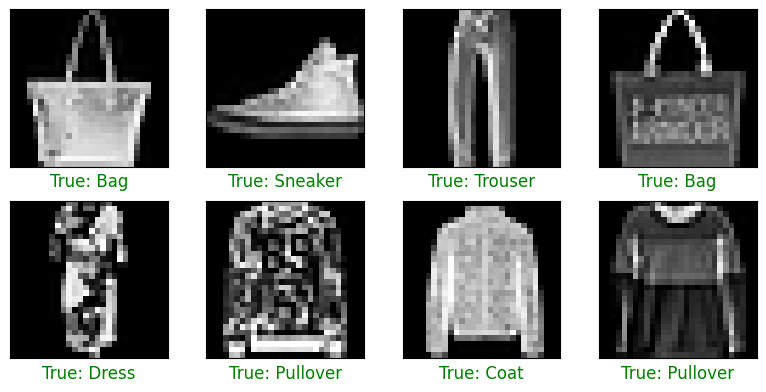

In [37]:
from typing import Optional
def plot_data(x_data: np.ndarray, y_data: np.ndarray, y_proba:Optional[np.ndarray]=None ) -> None:
    nrows, ncols = 2, 4
    fig, axes = plt.subplots(nrows, ncols, figsize=(8, 4))
    len_x = x_data.shape[0]

    for idx in range(nrows * ncols):
        ax = axes[idx // ncols, idx % ncols]
        img_idx = random.randint(0, len_x - 1)  # Ensure the range is valid
        ax.imshow(x_data[img_idx], cmap='gray')
        ax.set(xticks=[], yticks=[])
        color='green'
        true_label_str = f"True: {class_names[y_data[img_idx]]}"

        if y_proba is not None:
          predicted_idx= np.argmax(y_proba[img_idx])
          predicted_label= class_names[predicted_idx]
          color='red' if predicted_idx != y_data[img_idx] else color
          predicted_label_str=f"\nPredicted: {predicted_label}"

        img_title = true_label_str if y_proba is None else true_label_str + predicted_label_str
        ax.set_xlabel(true_label_str, color=color, fontsize=12)

    plt.tight_layout()
    plt.show()
plot_data(x_train,y_train)

# 2. Image Pre-processing

In [10]:
x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255

In [11]:
x_test.shape, x_test.dtype

((10000, 28, 28), dtype('float32'))

In [12]:
# Make sure image have shape (60000, 28, 28) => (60000,28,28,1)

x_train = np.expand_dims(x_train,axis=-1)

In [13]:
x_train.shape

(60000, 28, 28, 1)

In [14]:
x_test = np.expand_dims(x_test,axis=-1)

In [15]:
y_train_label=keras.utils.to_categorical(y_train,class_num)
y_test_label=keras.utils.to_categorical(y_test,class_num)

# 3. Network (ANN) Architecture

In [16]:
input_shape=(28,28,1)

In [17]:
model=keras.models.Sequential([
      layers.Flatten(input_shape=input_shape), # (28,28,1) => 28*28*1 = 784
      layers.Dense(512,activation='relu'),
      layers.Dense(256,activation='relu'),
      layers.Dense(class_num,activation='softmax')


])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [23]:
epochs=10
batch_size=128
history =model.fit(x_train,y_train_label,
          epochs=epochs,
          batch_size=batch_size,
          validation_split=0.1
          )

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9192 - loss: 0.2149 - val_accuracy: 0.8855 - val_loss: 0.3538
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9217 - loss: 0.2063 - val_accuracy: 0.8877 - val_loss: 0.3641
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9245 - loss: 0.1980 - val_accuracy: 0.8843 - val_loss: 0.3696
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9267 - loss: 0.1929 - val_accuracy: 0.8862 - val_loss: 0.3808
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9303 - loss: 0.1870 - val_accuracy: 0.8892 - val_loss: 0.3673
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9301 - loss: 0.1820 - val_accuracy: 0.8882 - val_loss: 0.3781
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9337 - loss: 0.1763 - val_accuracy: 0.8978 - val_loss: 0.3532
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9353 - loss: 0.1742 - val_acc

In [20]:
history_dict= history.history

In [21]:
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [22]:
train_loss, val_loss = history_dict['loss'], history_dict['val_loss']
train_acc, val_acc= history_dict['accuracy'], history_dict['val_accuracy']

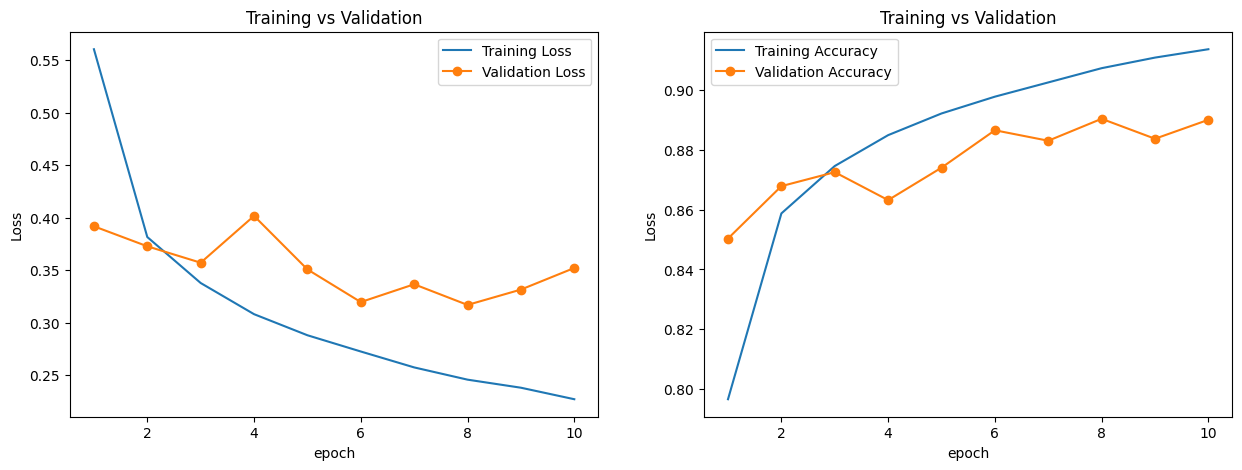

In [29]:
fig, (ax1, ax2)=plt.subplots(1,2, figsize=(15,5))
epochs_run = [i+1 for i in range(epochs)]

ax1.plot(epochs_run,train_loss,label='Training Loss')
ax1.plot(epochs_run,val_loss,label='Validation Loss',marker='o')
ax1.set(title="Training vs Validation", xlabel='epoch',ylabel='Loss')
ax1.legend()

ax2.plot(epochs_run,train_acc,label='Training Accuracy')
ax2.plot(epochs_run,val_acc,label='Validation Accuracy',marker='o')
ax2.set(title="Training vs Validation", xlabel='epoch',ylabel='Loss')
ax2.legend()
plt.show()

# 4. Model Evaluation

In [30]:
score= model.evaluate(x_test,y_test_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8867 - loss: 0.4627


In [31]:
print(f"Test Loss: {score[0]:.4f}")
print(f"Test Accuracy: {score[1]:.4f}")

Test Loss: 0.4425
Test Accuracy: 0.8870


# 5. Prediction

In [32]:
x_sample= x_test[:3]
y_proba= model.predict(x_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


In [34]:
y_proba.round(3)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [35]:
prediction= np.argmax(y_proba,axis=1)

In [36]:
[class_names[pred] for pred in prediction]

['Ankle boot', 'Pullover', 'Trouser']

In [38]:
y_proba= model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


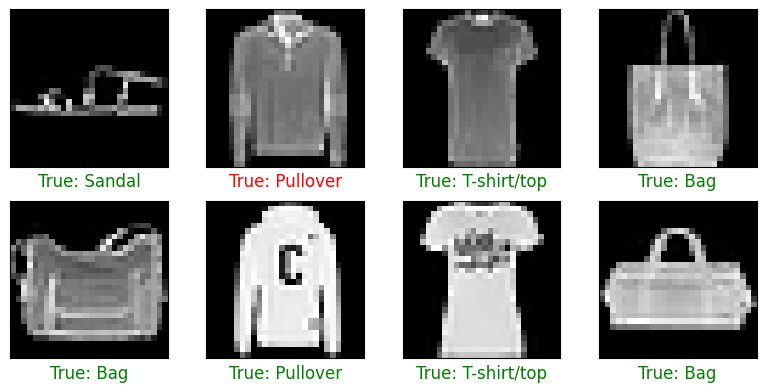

In [40]:
plot_data(x_test, y_test,y_proba)